# Laboratorio Optimización No. 9

> Daniel Alvarez - 201911320

### Importacion de Librerias:

In [47]:
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sympy as sym

- Primer punto

In [3]:
A1 = np.array([[1, 0],[0, 3]])
A2 = np.array([[-9, 0],[0, -9]])
A3 = np.array([[1, 5],[5, 1]])
A4 = np.array([[5, 1],[1, 5]])

In [4]:
u = np.linspace(-1,1,1000)
x, y = np.meshgrid(u,u)
# x.shape

In [5]:
def f(x, A):
    return np.dot(np.dot(x.T, A),x)

- a.

C:\Users\danie\AppData\Local\Temp\ipykernel_10604\680083286.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


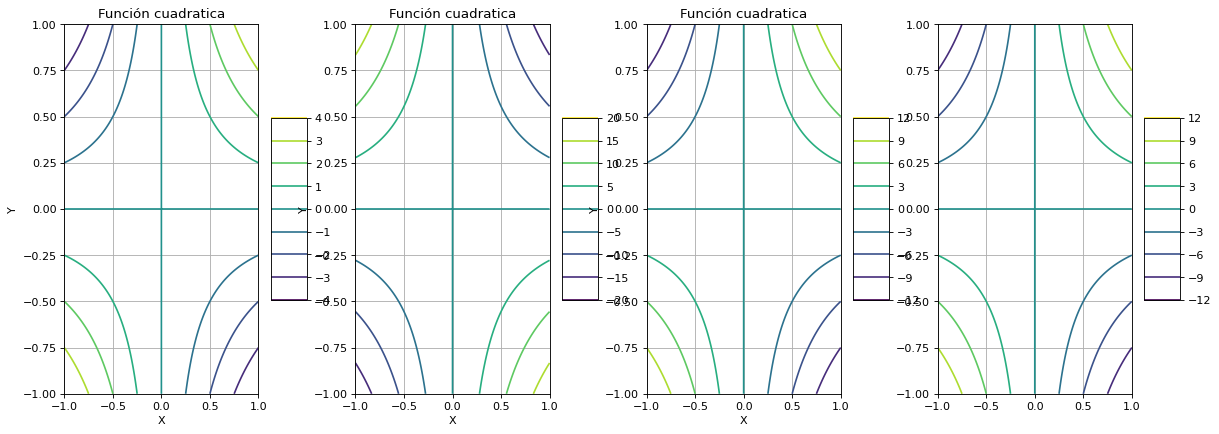

In [6]:
figure(figsize=(18, 6), dpi=80)
plt.title("Función cuadratica")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,4,1)
ax = plt.contour(x, y, f(x[0:2,:], A1))
plt.colorbar(ax, shrink=0.5, aspect=5)

plt.grid()
plt.title("Función cuadratica")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,4,2)
ax = plt.contour(x, y, f(x[0:2,:], A2))
plt.colorbar(ax, shrink=0.5, aspect=5)
plt.grid()

plt.title("Función cuadratica")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,4,3)
ax = plt.contour(x, y, f(x[0:2,:], A3))
plt.colorbar(ax, shrink=0.5, aspect=5)
plt.grid()

plt.title("Función cuadratica")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,4,4)
ax = plt.contour(x, y, f(x[0:2,:], A4))
plt.colorbar(ax, shrink=0.5, aspect=5)
plt.grid()

- b.

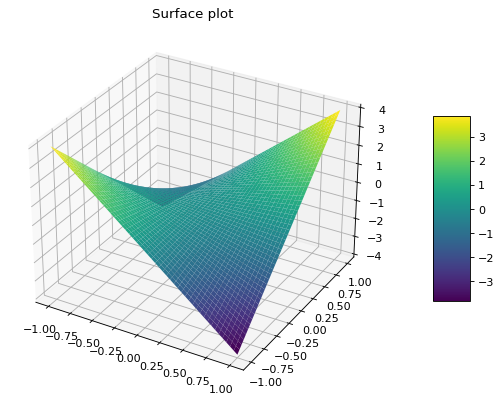

In [7]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A1),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

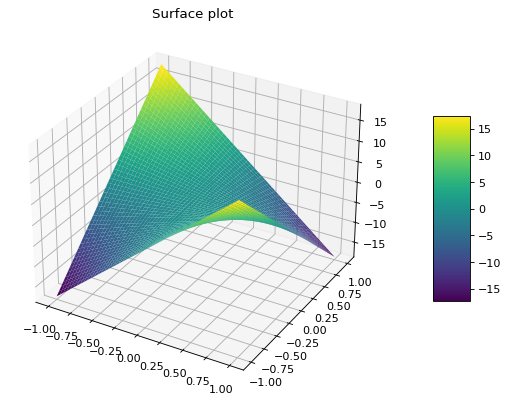

In [8]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A2),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

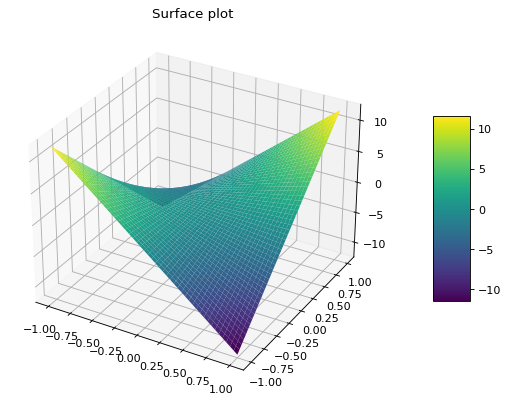

In [9]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A3),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

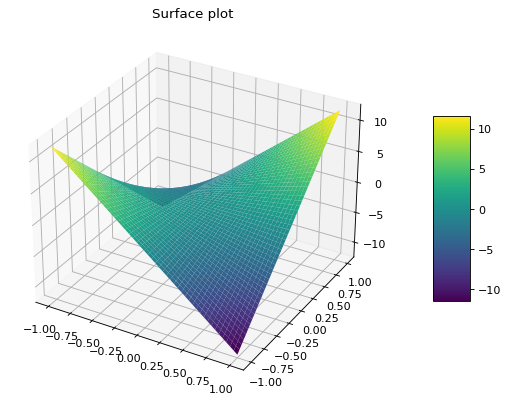

In [10]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A4),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

- c.

In [23]:
lam1 = np.linalg.eigvals(A1)
lam2 = np.linalg.eigvals(A2)
lam3 = np.linalg.eigvals(A3)
lam4 = np.linalg.eigvals(A4)

- Segundo Punto

In [11]:
rho = np.array([0, 0.25, -0.25, 0.75, -0.75, 1, -1, 2, 2])
A_rho = np.zeros((2, 2, len(rho)))
for i in range(len(rho)):
    A_rho[:, :, i] = np.array([[1, rho[i]],[rho[i],1]]) 

- a.

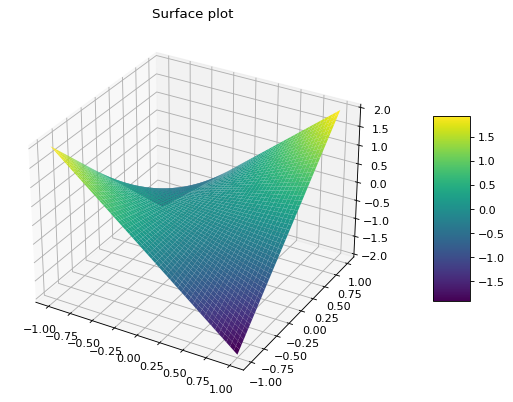

In [11]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,0]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

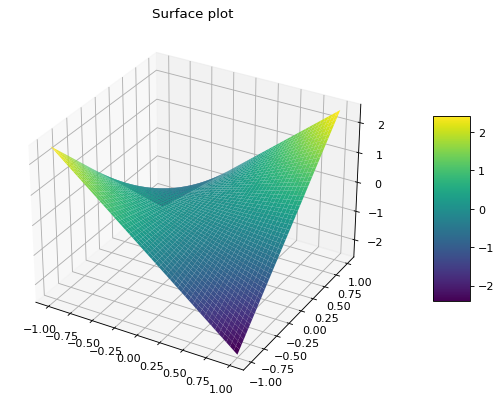

In [12]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,1]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

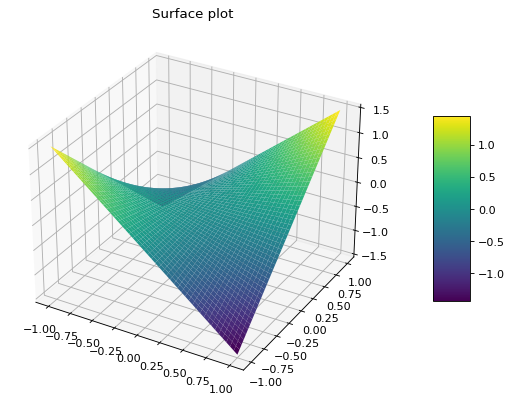

In [13]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,2]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

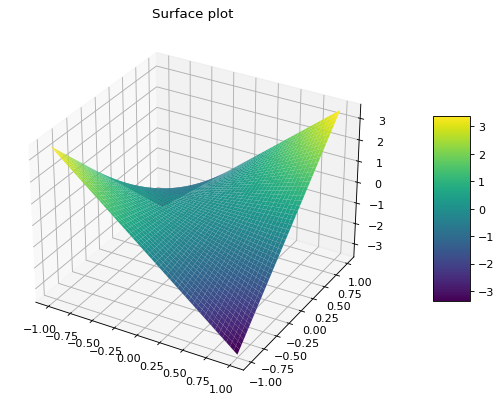

In [14]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,3]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
- b.

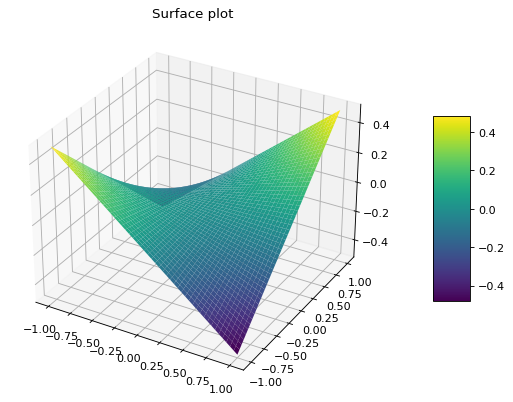

In [12]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,4]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

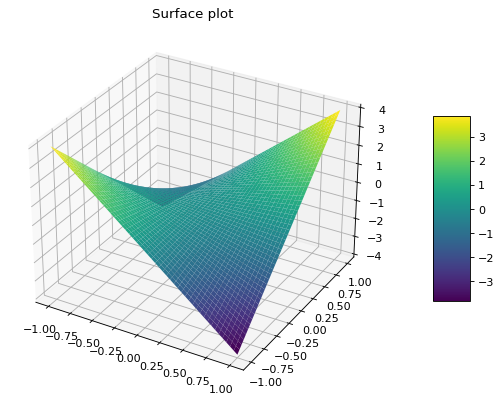

In [13]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,5]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

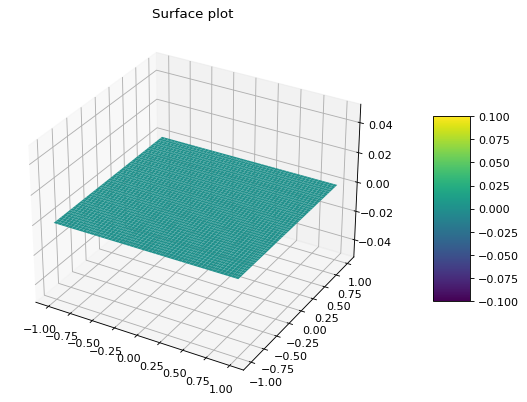

In [14]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,6]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

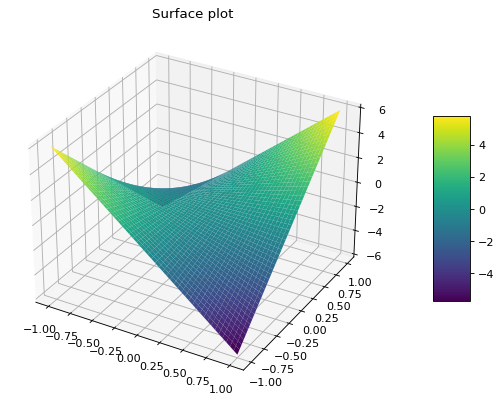

In [15]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,7]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

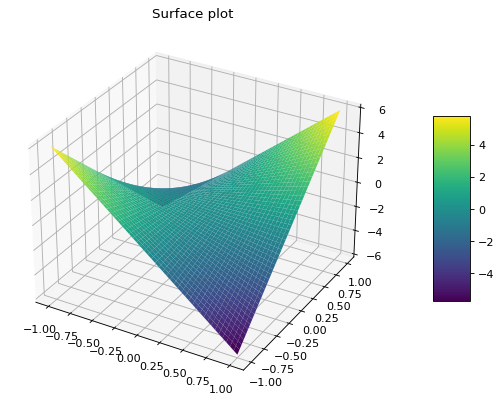

In [16]:
fig = plt.figure(figsize=(18, 6), dpi=80)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,8]),cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

- b.

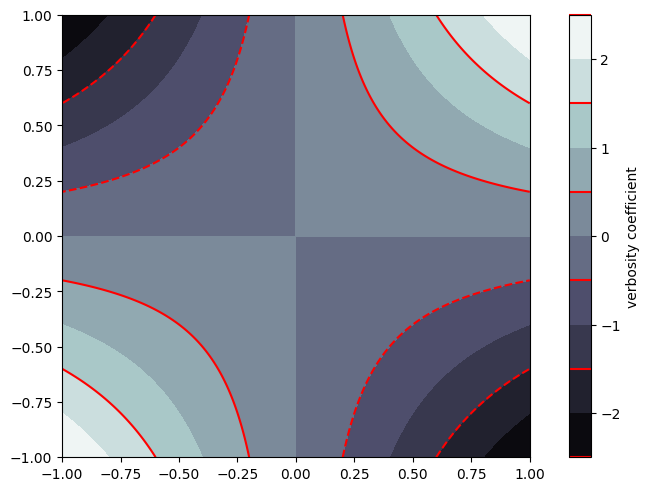

In [33]:
def sel_contourf(j):
    origin = 'lower'
    fig1, ax2 = plt.subplots(constrained_layout=True)
    CS = ax2.contourf(x, y, f(x[0:2,:], A_rho[:,:,j]), 10, cmap=plt.cm.bone, origin=origin)
    CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)
    cbar = fig1.colorbar(CS)
    cbar.ax.set_ylabel('verbosity coefficient')
    # Add the contour line levels to the colorbar
    cbar.add_lines(CS2)

sel_contourf(1)

- c.

In [17]:
autovettori2 = np.zeros((2, 2, len(rho)))
autovalori2 = np.zeros((2,len(rho)))
for i in range(len(rho)):
    autovalori2[:,i], autovettori2[:,:,i] = np.linalg.eig(A_rho[:, :, i])

- Tercer Punto

In [37]:
def norm_eig(A):
    autovalori, autovettori = np.linalg.eig(A)
    v = np.zeros((autovettori.shape))
    for j in range(len(autovettori[:,0])):
        v[:,j] = autovettori[:,j]/np.linalg.norm(autovettori[:,j])
    return autovalori, v

- a. 

C:\Users\danie\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


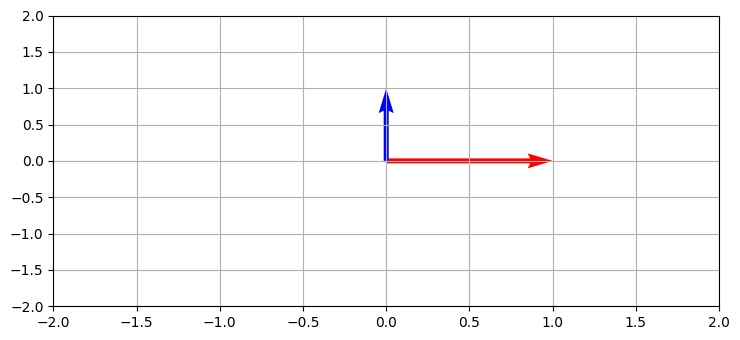

In [93]:
[la1, v1] = norm_eig(A1)
[la2, v2] = norm_eig(A2)
[la3, v3] = norm_eig(A3)
[la4, v4] = norm_eig(A4)
# prueba
# c0 = np.linalg.norm(v1[:,0])
# c1 = np.linalg.norm(v1[:,-1])
# c2 = np.linalg.norm(v2[:,0])
# c3 = np.linalg.norm(v2[:,-1])
# c4 = np.linalg.norm(v3[:,0])
# c5 = np.linalg.norm(v3[:,-1])
# c6 = np.linalg.norm(v4[:,0])
# c7 = np.linalg.norm(v4[:,-1])
def graph_norm(lamb, m_vector):
    soa = m_vector
    origin = np.array([[0, 0],[0, 0]]) # origin point
    plt.figure()
    plt.quiver(*origin, soa[:,0], soa[:,-1], angles='xy', scale_units='xy', color=['r','b','g'], scale=1)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid()
    plt.show()  
graph_norm(1,v1)


- b.

- Cuarto Punto

- Quinto Punto

> Nótese que si tomamos la región de forma tal que

In [56]:
x,y,z = sym.symbols('x,y,z')
eq1 = sym.Eq((x**2)/4 + (y**2)/9, 25)
eq2 = sym.Eq(z, 0)
result = sym.solve([eq1,eq2],(z))
print(result)

{z: 0}
